### 4. **Análisis de Cohortes**
**Resumen:** El análisis de cohortes permite agrupar datos según características específicas y observar cómo se comportan a lo largo del tiempo. Se centra en cohortes de precios y ventas para entender las dinámicas del mercado.

In [2]:
# Llegim les dades del dataframe y preparem la columna date correctament

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'}) # Primera columna sin titulo, potencialmente eliminable
df_cp = df_cp.rename(columns={'4046': 'Volume_Hass_S'}) # Etiquetas mas descritivas
df_cp = df_cp.rename(columns={'4225': 'Volume_Hass_L'})
df_cp = df_cp.rename(columns={'4770': 'Volume_Hass_XL'})
df_cp_cleaned = df_cp.drop('Col_0', axis=1) # Parecen IDs del 0 al 52. Eliminable. # Col_0 = df_cp['Col_0'].unique()  print(f"Col_0: {Col_0}\n")
# df_cp_cleaned = df_cp[df_cp.region != 'TotalUS'] # Para seleccionar unicamente las regiones propias , descartamos Total US para la vista gráfica

In [3]:
region_classification = {
'Albany': 'City',
'Atlanta': 'City',
'BaltimoreWashington': 'Region',
'Boise': 'City',
'Boston': 'City',
'BuffaloRochester': 'Region',
'California': 'GreaterRegion',
'Charlotte': 'City',
'Chicago': 'City',
'CincinnatiDayton': 'Region',
'Columbus': 'City',
'DallasFtWorth': 'Region',
'Denver': 'City',
'Detroit': 'City',
'GrandRapids': 'City',
'GreatLakes': 'GreaterRegion',
'HarrisburgScranton': 'Region',
'HartfordSpringfield': 'Region',
'Houston': 'City',
'Indianapolis': 'City',
'Jacksonville': 'City',
'LasVegas': 'City',
'LosAngeles': 'City',
'Louisville': 'City',
'MiamiFtLauderdale': 'Region',
'Midsouth': 'GreaterRegion',
'Nashville': 'City',
'NewOrleansMobile': 'Region',
'NewYork': 'City',
'Northeast': 'GreaterRegion',
'NorthernNewEngland': 'Region',
'Orlando': 'City',
'Philadelphia': 'City',
'PhoenixTucson': 'Region',
'Pittsburgh': 'City',
'Plains': 'GreaterRegion',
'Portland': 'City',
'RaleighGreensboro': 'Region',
'RichmondNorfolk': 'Region',
'Roanoke': 'City',
'Sacramento': 'City',
'SanDiego': 'City',
'SanFrancisco': 'City',
'Seattle': 'City',
'SouthCarolina': 'Region',
'SouthCentral': 'GreaterRegion',
'Southeast': 'GreaterRegion',
'Spokane': 'City',
'StLouis': 'City',
'Syracuse': 'City',
'Tampa': 'City',
'TotalUS': 'TotalUS',
'West': 'GreaterRegion',
'WestTexNewMexico': 'Region'
}

classification_colors = {'City':'green' ,'Region':'yellow' ,'GreaterRegion':'orange', 'State':'red', 'TotalUS': 'blue'}

df_cp_cleaned['region_class']= df_cp_cleaned['region'].map(region_classification)

## 1. **Cohortes Basadas en Precios Promedios Trimestrales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.

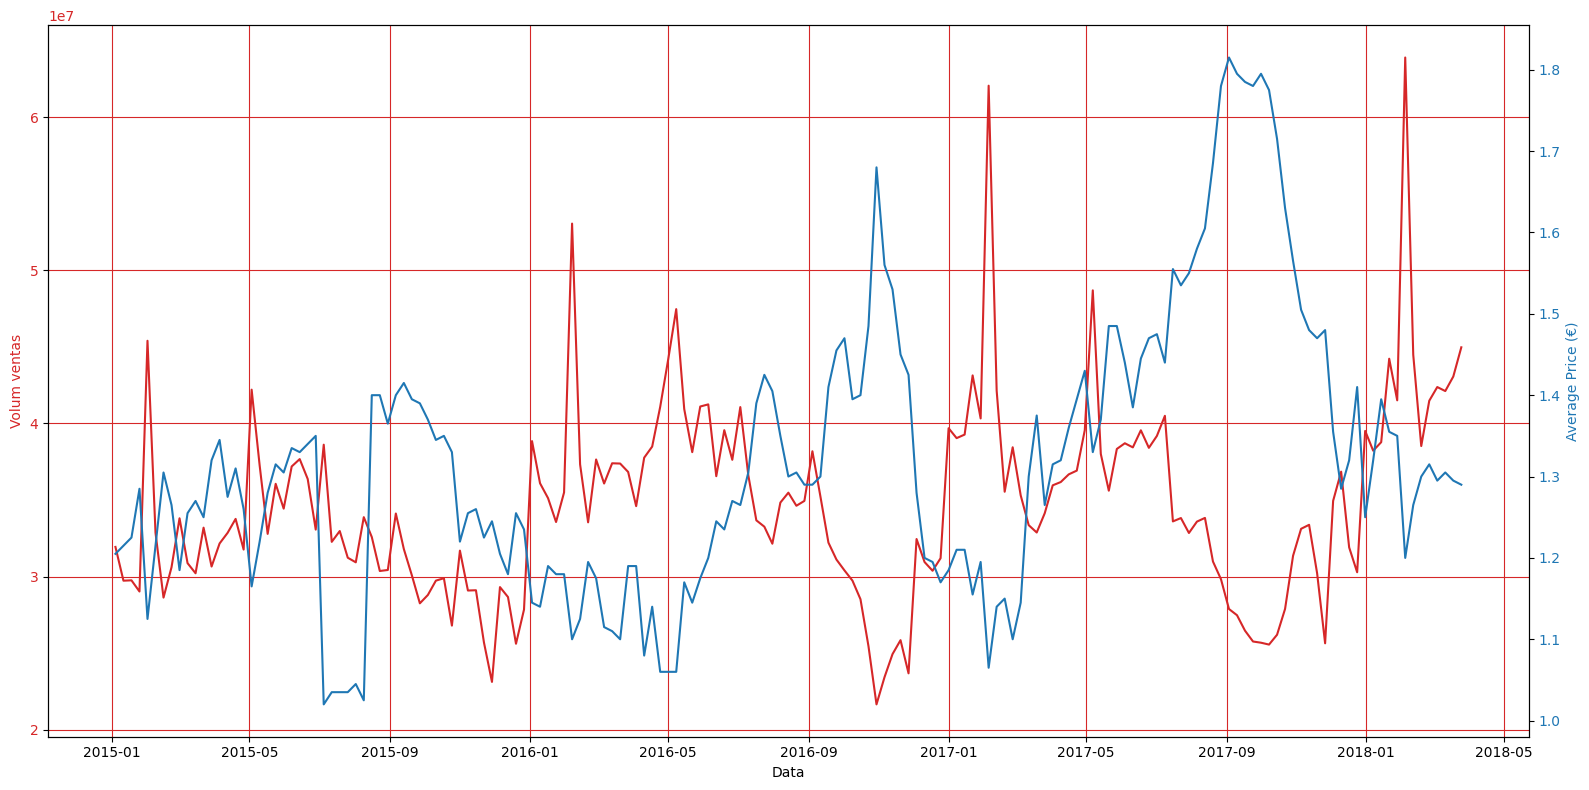

In [8]:
#Output representation
df_USA = df_cp_cleaned[df_cp_cleaned['region']=='TotalUS'].copy()
df_media = df_USA.groupby([pd.Grouper(key='Date', freq='QS')]).agg({'AveragePrice':'mean', 'Total Volume':'sum'}).reset_index()
df_media = df_USA.groupby(['Date']).agg({'AveragePrice':'mean', 'Total Volume':'sum'}).reset_index()

df_media['Date offset'] = df_media['Date'] - pd.DateOffset(months=5)


# display(df_temp)
#%%
fig, ax1 = plt.subplots(figsize=(16,8))
#plt.title('Estudio economico')
color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('Volum ventas', color=color)
ax1.plot(df_media['Date'], df_media['Total Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Price (€)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_media['Date'], df_media['AveragePrice'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
# plt.ylim(0, 5)

#ax2.grid(color=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.xticks(rotation = 90)
plt.show()

2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.

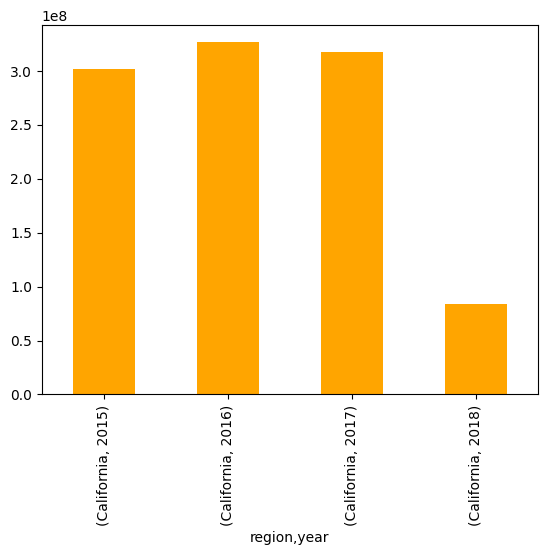

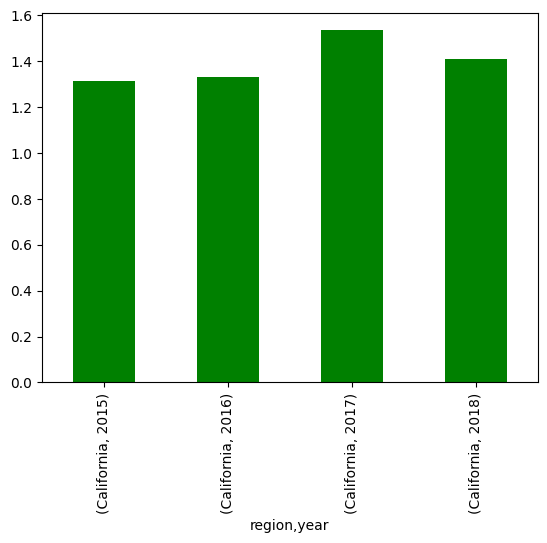

In [17]:
#Output representation
df_no_USA = df_cp_cleaned[df_cp_cleaned['region']=='California']
df_media = df_no_USA.groupby(['region', 'year']).agg({'Total Volume':'sum', 'AveragePrice':'mean'})#.reset_index()

df_media['Total Volume'].plot(kind='bar', label = 'Total Volume', color= 'orange')
plt.show()

df_media['AveragePrice'].plot(kind='bar', label = 'Average Price', color= 'green')
plt.show()



3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.

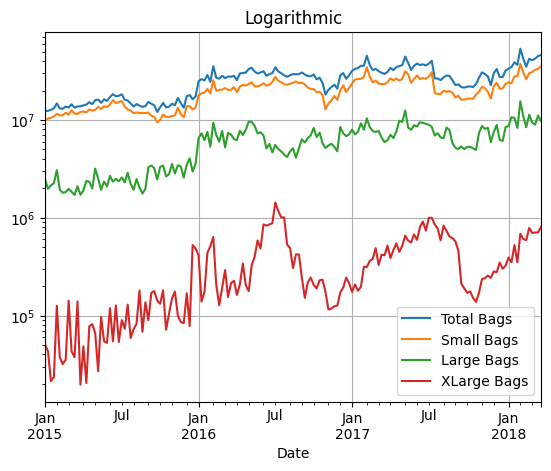

In [29]:
columnas_bags = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

fig, ax= plt.subplots()
for title_bag in columnas_bags:
    

    df_bag_temp= df_cp_cleaned.groupby('Date')[title_bag].sum()

    df_bag_temp.plot(kind = 'line', ax=ax, label= title_bag)

plt.yscale('log')

plt.title('Logarithmic')
plt.grid()
plt.legend()
plt.show()

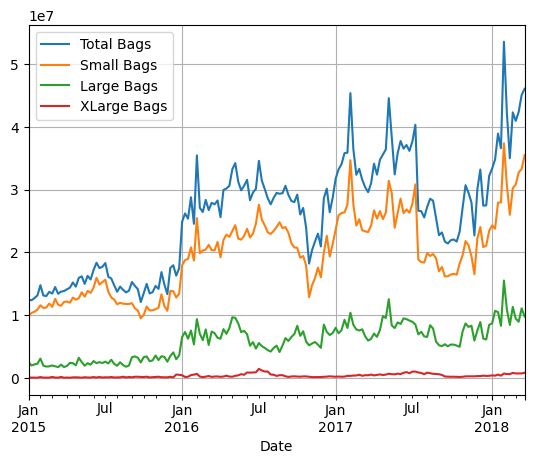

In [28]:
columnas_bags = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

fig, ax= plt.subplots()
for title_bag in columnas_bags:
    

    df_bag_temp= df_cp_cleaned.groupby('Date')[title_bag].sum()

    df_bag_temp.plot(kind = 'line', ax=ax, label= title_bag)

# plt.yscale('log')
    
plt.grid()
plt.legend()
plt.show()

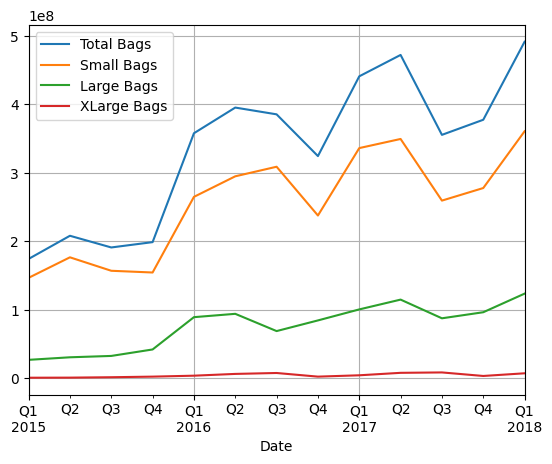

In [33]:

columnas_bags = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

fig, ax= plt.subplots()
for title_bag in columnas_bags:
    

    df_bag_temp= df_cp_cleaned.groupby([pd.Grouper(key='Date', freq='QS')])[title_bag].sum()

    df_bag_temp.plot(kind = 'line', ax=ax, label= title_bag)

# plt.yscale('log')
    
plt.grid()
plt.legend()
plt.show()

4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.

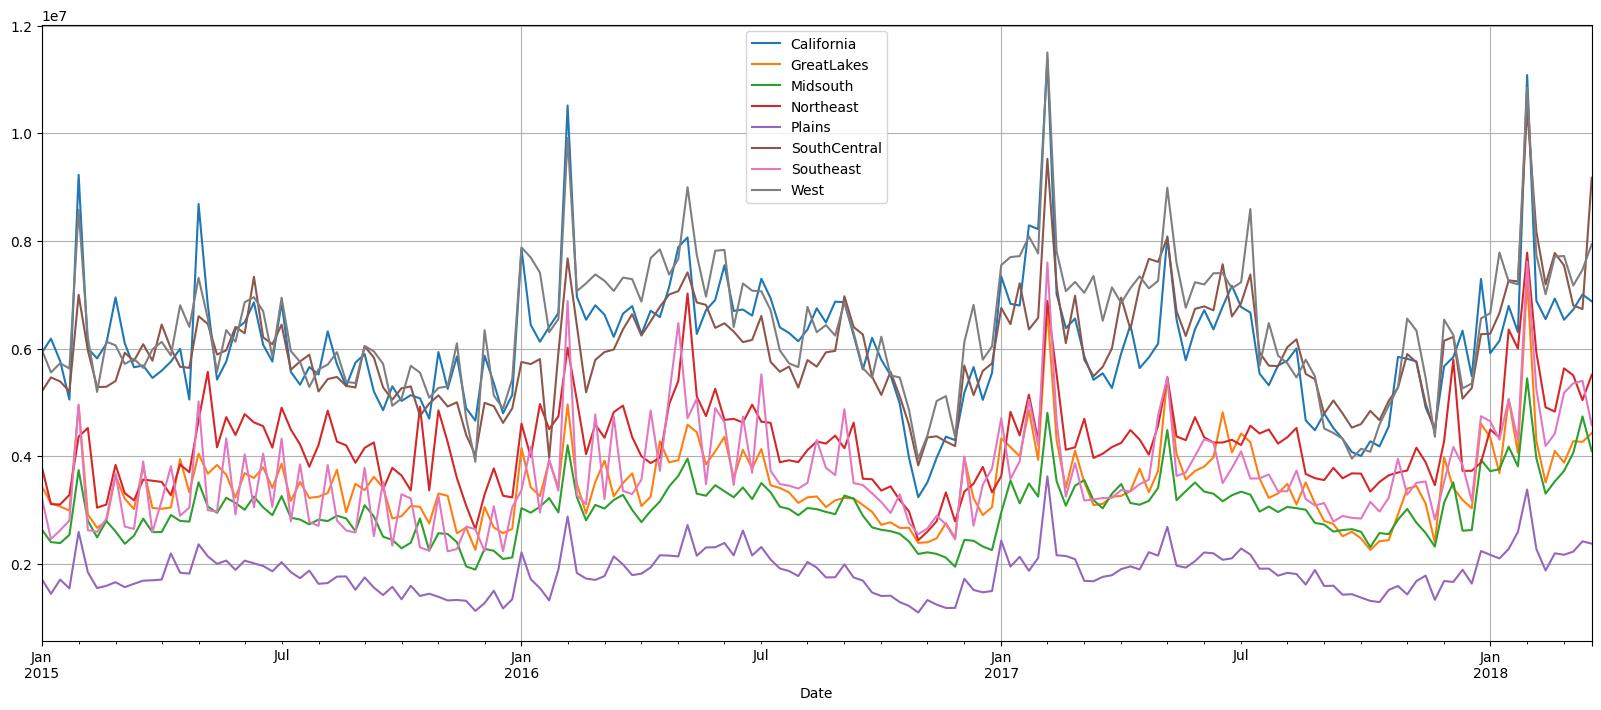

In [47]:
df_cleaned_great_regions = df_cp_cleaned[df_cp_cleaned['region_class']=='GreaterRegion']
# df_cleaned_great_regions = df_cleaned_great_regions[(df_cleaned_great_regions['Date']<'15-03-2018')&(df_cleaned_great_regions['Date']>'01-01-2018')]
great_regions = pd.unique(df_cleaned_great_regions['region'])

fig, ax= plt.subplots(figsize=(20,8))
for region in great_regions:

    df_temp_region = df_cleaned_great_regions[df_cleaned_great_regions['region'] ==region ]
    df_date_region= df_temp_region.groupby('Date')['Total Volume'].sum()
    df_date_region.plot(kind = 'line', ax=ax, label= region)

# plt.yscale('log')
    
plt.grid()
plt.legend()
plt.show()

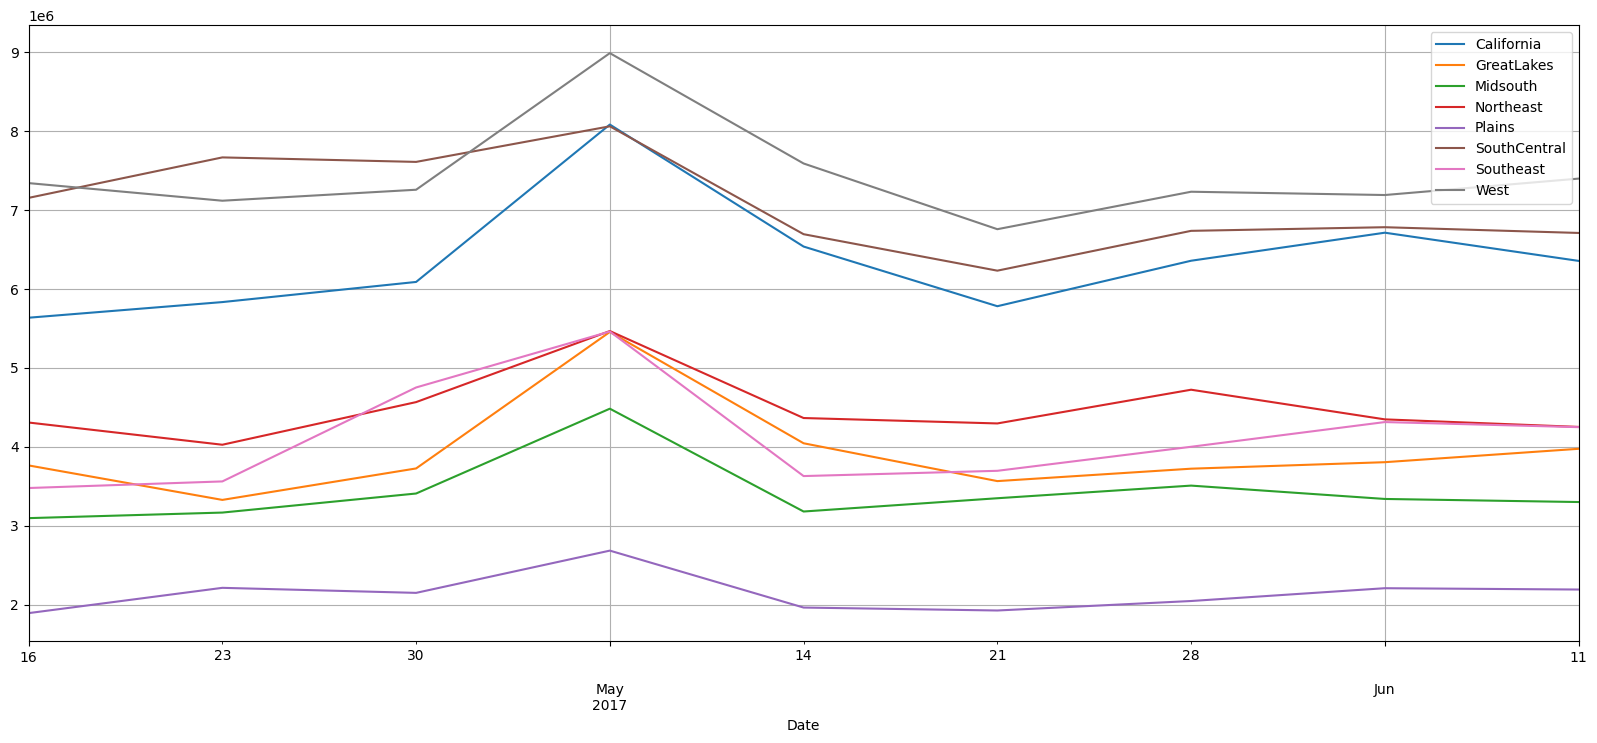

In [56]:
df_cleaned_great_regions = df_cp_cleaned[df_cp_cleaned['region_class']=='GreaterRegion']
df_cleaned_great_regions = df_cleaned_great_regions[(df_cleaned_great_regions['Date']<'2017-06-15')&(df_cleaned_great_regions['Date']>'2017-04-15')]
great_regions = pd.unique(df_cleaned_great_regions['region'])

fig, ax= plt.subplots(figsize=(20,8))
for region in great_regions:

    df_temp_region = df_cleaned_great_regions[df_cleaned_great_regions['region'] ==region ]
    df_date_region= df_temp_region.groupby('Date')['Total Volume'].sum()
    df_date_region.plot(kind = 'line', ax=ax, label= region)

# plt.yscale('log')
    
plt.grid()
plt.legend()
plt.show()

5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.

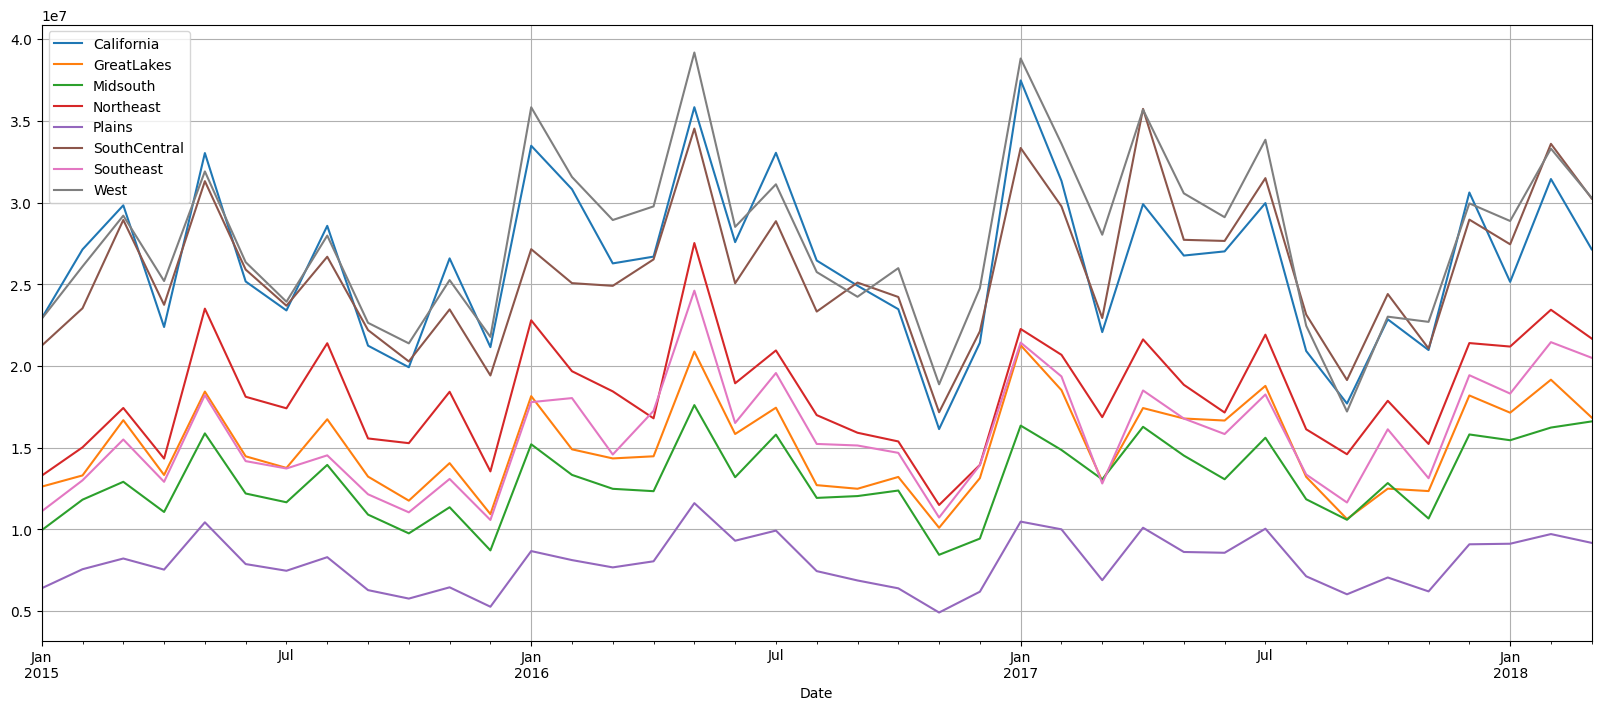

In [68]:
df_cleaned_great_regions = df_cp_cleaned[df_cp_cleaned['region_class']=='GreaterRegion']
# df_cleaned_great_regions = df_cleaned_great_regions[(df_cleaned_great_regions['Date']<'15-03-2018')&(df_cleaned_great_regions['Date']>'01-01-2018')]
great_regions = pd.unique(df_cleaned_great_regions['region'])

fig, ax= plt.subplots(figsize=(20,8))
for region in great_regions:

    df_temp_region = df_cleaned_great_regions[df_cleaned_great_regions['region'] ==region ]
    df_date_region= df_temp_region.groupby([pd.Grouper(key='Date', freq='MS')])['Total Volume'].sum()
    df_date_region.plot(kind = 'line', ax=ax, label= region)

# plt.yscale('log')
    
plt.grid()
plt.legend()
plt.show()